<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Robert Renecker

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

$$ \sum_{n=0}^{\infty}xe^{-x^2/10} \rightarrow 5*C \rightarrow 5C = 1 \rightarrow C = \frac{1}{5}$$
**The value of c s.t. f(x) is a valid density function is C=1/5**

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

** CDF is: (by plugging in x to upper limit on new pdf from 0 to x)**  
$$F(x) = -e^{-x^2/10}+1 $$

$$ \text{sanity checks:}  \\
    1. F(0) = \sum{n=0}^{0} 1/5*x*e^{-x^2/10} \rightarrow 0\\
    2. \lim_{x\to \infty} \rightarrow \sum_{n=0}^{\infty} 1/5*x*e^{-x^2/10} \rightarrow 1
$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

**ANS: 2.63277 **
$$ \text{using cdf:} -e^{-x^{2}/10}+1=.5 \rightarrow 2.63277 $$
$$ .5 = \sum_{n=0}^{x} 1/5*x*e^{-x^2/10} \rightarrow -e^{-x^2/10}+1 = .5 \rightarrow x = 2.63277 $$

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

** Probability that the storm will e a Octogeddon**   
* Need to sum the probability that the storm surge is over 6 feet. 

$$ P(X>6) = 1 - P(X\le{6) \rightarrow 1-\sum_{n=0}^{6} 1/5*x*e^{-x^2/10}} $$
$$ P(X>6) = 1 - .97268... \rightarrow \textbf{Answer: .02732} $$


**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

$$ \text{P(non-Octogeddon \and storm) 3 times: }\\
            P(non-Octo|storm)^3 \rightarrow (.97268*(5/365)^3) \rightarrow 
            $$

** DO THIS **

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

# Wait time
the average time a person will have to wait in Johns line is (1/4)(10) --> 2.5 minutes  

the average time a person will have to wait in self checkout (working) is (1/5)(10) --> 2 minutes

the average time a person will have to wait in self checkout (not working) is (1/1)(10) --> 10 minutes

# # of customers
The number of customers who pass through each line in a given 10-minute interval will follow a Poisson distribution.  
The parameters will be lambda = 4 in a 10 minute period.  

The number of customers who pass through the self checkout in a given 10 minute interval will also follow a Poisson distribution and will have a .9 probility of there paramter lambda = 5. They will have a .1 probability of parameter lambda =  1

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

$$
    \frac{e^{-4}*4^{6} }{6!} \rightarrow .104
    $$

Working self checkout:  
$$
\frac{e^{-5}*5^{6} }{6!}  \rightarrow  .14622 
$$

Not-working self checkout:  
    $$
    \frac{e^{-1}*1^{6} }{6!}  \rightarrow  .00051
    $$

**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

**ANS: **  

.00051 + .14622 = **.14673**

**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

Johns poisson distribution for 5 hours (4-9PM) shift would have lambda = 4 per 10 mins * 6 (6 10 mins per hour) * 5 ( 5 total hours) ==> 120 customers per 5 hours rate.

**ANS**
$$ 1-\int _0^{100}\:\frac{\left(e^{-120}120^x\right)}{x!} \rightarrow .968835 $$

**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [19]:
def checkout_count(time_len, rate_work, rate_broken, p):
    # Magic (It actually could be because I have no idea how it works)
    #rate work = 1/rate_work.
    #rate_broken = 1/rate_broken
    #probability it's working = p
    probability_choice = [rate_work for i in range(0,int(p*10)) ];
    prob_compliment = [rate_broken for i in range(0, int(10-p*10))];
    prob = probability_choice + prob_compliment;
    total_cust = [];
    for i in range(0, 5000):
        cust_served = 0;
        while time_len < 300:
            #choose the machine for this customer
            machineRate = np.random.choice(prob,1)[0]/10;
            temp = np.random.exponential(1/machineRate);
            time_len += temp;
            cust_served += 1;    
        total_cust.append(cust_served);
        time_len = 0;
    custMean = np.sum(total_cust)/5000;
    
    return custMean;

In [20]:
total_customers = checkout_count(0,5,1,.9);
print(total_customers);

108.474


In [21]:
#verify part D
total_customers = checkout_count(0,4,0,1);
print(total_customers);

121.2262


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

** NEED THIS DONE ** 

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [22]:
def pmf_natural(x):
    #something
    temp =  np.log10(((x+1)/x))
    return temp;
natural_dist = [pmf_natural(i) for i in range(1,10)]

**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

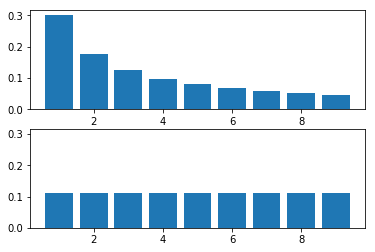

In [23]:
fig, ax = plt.subplots(2,1, sharey=True);
numbs = [1,2,3,4,5,6,7,8,9];
ax[0].bar(numbs, natural_dist,);
ax[1].bar(numbs, [(1/9) for i in range(1,10)])

plt.show();

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [24]:
def cdf_natural(y):
    # something
    cdf = 0;
    for i in range(1,y+1):
        cdf += pmf_natural(i);
    return cdf
print("The cumulative probability that the number will be at most 4 is: %f " % cdf_natural(4));
print("The cumulative probability that the number will be at most 5 is: %f" % cdf_natural(5));

The cumulative probability that the number will be at most 4 is: 0.698970 
The cumulative probability that the number will be at most 5 is: 0.778151


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

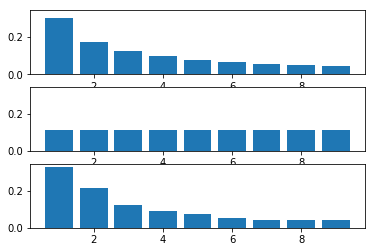

Based on our three graphs, the first one being the natural logerithmic distribution which follows natural occurance of leading digits...
The second graph being the pmf distribution of falsified numbers by people trying to commit fraud.
Based on looking at our third graph which followed the distribution of our tax data from 1978, we should assume that it closely follows the natural number distribution of graph 1!.

Thus, our final assumption should be that the data we analyzed is of natural occuring numbers, not fraudulent ones. 


In [25]:
def mapFunc(x):
    temp = str(x);
    return int(temp[0]);
dataframe = pd.read_table("tax_data.txt");
dataframe = pd.Series(dataframe.iloc[:,0]);

dataframe = dataframe.apply(mapFunc);
temp = dataframe.nonzero();
dataframe = dataframe.iloc[temp[0]];
#we have our total count of each unique value [i.e., {1,2,..,9}]
getCounts = dataframe.value_counts();
#lets normalize them over total # of digits
getNormCounts = [x/len(dataframe) for x in getCounts]

#plot the normalized probability mass of the tax data versus the two earlier pmf's. 

fig, ax = plt.subplots(3,1, sharey=True);
numbs = [1,2,3,4,5,6,7,8,9];
ax[0].bar(numbs, natural_dist,);
ax[1].bar(numbs, [(1/9) for i in range(1,10)])
ax[2].bar(numbs, getNormCounts);
plt.show();


print("Based on our three graphs, the first one being the natural logerithmic distribution which follows natural occurance of leading digits...")
print("The second graph being the pmf distribution of falsified numbers by people trying to commit fraud.");
print("Based on looking at our third graph which followed the distribution of our tax data from 1978, we should assume that it closely follows the natural number distribution of graph 1!.");

print()
print("Thus, our final assumption should be that the data we analyzed is of natural occuring numbers, not fraudulent ones. ")

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

$${7 \choose 4}*(.56)^{5}*(1-.56)^3 \rightarrow .16419 $$

**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

* Sum up all events of tony winning *  
$$(.56)^{5} + {5 \choose 4}*(.56)^5*(.44) + {6 \choose 4} * (.56)^5 * (.44)^2 + {7 \choose 4}*(.56)^5*(.44)^3 + {8 \choose 4}(.56)^5*(.44)^4 \rightarrow .6448577 $$
Chat Conversation End
Type a message...



**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

** FUTURE ROB YOU PRACTICALLY ALREADY DID THIS AND KNOW HOW TO DO IT JUST DO IT AND DON'T FORGET I SWEAR TO GOD IF YOU FORGET TO DO THIS !!!! ** 

**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

**ANS: The fact that he has a higher probability of winning means that over time his partner will reach a probability of 0 before Tony does. This in turn means that having a longer tournament ensures a higher probability of Tony winning the entire tournament but it also means that he is losing out on more money as even though he will have a higher liklihood of winning, he will lose an extra $180 for every 2 games he has to win by extending the tournament to the next odd number. **

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [133]:
def optimal_series(p):
    # something
    expected_payouts = [];
    series_count = [i for i in range(3,100, 2)];
    tony_win_p = p;
    tony_lose_p = 1-p;

    #for every series {3,5,...,99}
    for x in series_count:
        take_away = 0;
        final_value = 10000;
        has_to_win = int(np.floor(x/2)+1);
        series_value = (tony_win_p)**(has_to_win)*(has_to_win*90);
        #for all (tony_win_prob)^(the # games it takes tony to win) * (lost_probability)^(all games oponnent can win)
        
        for i in range(1,has_to_win):
            #comb is correct
            combination_count = comb(i+has_to_win-1, has_to_win-1 )
            #
            series_value += (has_to_win*90)*combination_count* ((tony_win_p)**(has_to_win)) * ((tony_lose_p)**(i));
            #print("series %d " %x, series_value, combination_count, tony_win_p, has_to_win, tony_lose_p);
            
    
        
    
        final_value -= series_value/has_to_win;
        #print("expected payout of series: %d " %x , final_value);
        
        expected_payouts.append(final_value);
 
    
   
    
    print(expected_payouts);
    #Expected payout versus series length x { 3, ..., 99}
    #y is [0,10000]
    print(max(expected_payouts));
    
    plt.scatter(series_count, expected_payouts);
    plt.show();
    
                
                
            
     
    optimal_series_length = 1
    return optimal_series_length;

[9929.44, 9924.6772, 9921.34324, 9918.8927794, 9917.0402311864, 9915.613769061929, 9914.50112860484, 9913.624924244883, 9912.929802119317, 9912.375094663115, 9911.930320139143, 9911.572276647345, 9911.2830876732, 9911.048844604144, 9910.85863923207, 9910.703859610545, 9910.577668695583, 9910.474612781698, 9910.39032389213, 9910.321291291575, 9910.264684559119, 9910.218215577841, 9910.18003019757, 9910.148622722301, 9910.122768088657, 9910.101467848172, 9910.083906983238, 9910.069419269666, 9910.057459412326, 9910.047580570163, 9910.039416185124, 9910.032665259245, 9910.02708040238, 9910.022458112022, 9910.018630855608, 9910.015460611543, 9910.012833593082, 9910.010655933043, 9910.008850150334, 9910.007352253577, 9910.006109364607, 9910.005077766764, 9910.004221300647, 9910.00351004447, 9910.002919227669, 9910.00242833597, 9910.002020373637, 9910.001681254947, 9910.001399301978]
9929.44


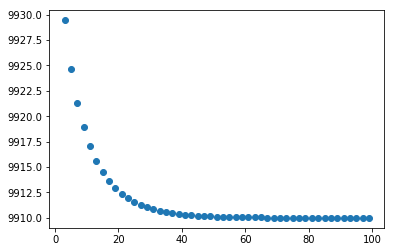

In [134]:
optimal_series(.7);

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [ ]:
#ace is value 14 (high)
#1000 simulations
values = [];
for s in range(10000):
    
    a = [i for i in range(1,14) for j in range(4)]

    temp = np.random.choice(a);
    a.remove(temp);
    temp2 = np.random.choice(a);
    values.append(np.abs(temp-temp2));

print("The probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either")
print("identical value or adjacent value is %f" % ((values.count(1)+values.count(0)) / 10000 ))

**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [ ]:
#Cards form a run
#1000 simulations
values = [];
for s in range(10000):
    test1 = [3,4,5];
    test2 = [5,6,7];
    a = [i for i in range(1,14) for j in range(4)]

    temp = np.random.choice(a);
    a.remove(temp);
    temp2 = np.random.choice(a);
    a.remove(temp2);
    temp3 = np.random.choice(a);
    
    tempL = [temp, temp2, temp3];
    tempL.sort();

    if (tempL[2]-tempL[1] == 1 and tempL[1]-tempL[0] == 1):
        values.append(tempL);

        
prob = len(values)/10000;
print("probability that the cards form a run is %f" % prob);

**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

In [ ]:
** DO THIS ** 

**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

In [ ]:
** DO THESE **